In [1]:
import os #directory operations
import numpy as np #array and matrices
import matplotlib.pyplot as plt #visualization
import tensorflow as tf #lib to build newral networks
from tensorflow.keras.preprocessing.image import ImageDataGenerator #agumentation(fliping,rotating the images)
from tensorflow.keras.models import Sequential # stack of layers where each layer has one input and output
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout #cnn related
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint #earlystoping-stoping training if improvement not made,.............

In [2]:
! pip install kaggle

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
mkdir ~/.kaggle

In [8]:
!cp /content/drive/MyDrive/kaggle_API/kaggle.json  ~/.kaggle/

In [9]:
! chmod 600 ~/.kaggle/kaggle.json

In [10]:
! kaggle datasets download akashshingha850/mrl-eye-dataset

Dataset URL: https://www.kaggle.com/datasets/akashshingha850/mrl-eye-dataset
License(s): MIT
 99% 326M/329M [00:19<00:00, 16.0MB/s]
100% 329M/329M [00:19<00:00, 17.3MB/s]


In [11]:
! unzip "/content/mrl-eye-dataset.zip"

Streaming output truncated to the last 5000 lines.
  inflating: data/val/sleepy/s0013_02688_0_1_0_0_0_01.png  
  inflating: data/val/sleepy/s0013_02689_0_1_0_0_0_01.png  
  inflating: data/val/sleepy/s0013_02692_0_1_0_0_0_01.png  
  inflating: data/val/sleepy/s0013_02693_0_1_0_0_0_01.png  
  inflating: data/val/sleepy/s0013_02694_0_1_0_0_0_01.png  
  inflating: data/val/sleepy/s0013_02700_0_1_0_0_0_01.png  
  inflating: data/val/sleepy/s0013_02710_0_1_0_0_0_01.png  
  inflating: data/val/sleepy/s0013_02713_0_1_0_0_0_01.png  
  inflating: data/val/sleepy/s0013_02716_0_1_0_0_0_01.png  
  inflating: data/val/sleepy/s0013_02726_0_1_0_0_0_01.png  
  inflating: data/val/sleepy/s0013_02728_0_1_0_0_0_01.png  
  inflating: data/val/sleepy/s0013_02738_0_1_0_1_0_01.png  
  inflating: data/val/sleepy/s0013_02748_0_1_0_0_0_01.png  
  inflating: data/val/sleepy/s0013_02755_0_1_0_0_0_01.png  
  inflating: data/val/sleepy/s0013_02778_0_1_0_0_0_01.png  
  inflating: data/val/sleepy/s0013_02806_0_1_0_0_

In [12]:
# Define paths
train_dir = "/content/data/train"
val_dir = "/content/data/val"
test_dir = "/content/data/test"

# **Data Preprocessing & Data Augmentation**

In [13]:
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255, #rescale pixels from 0to 1
    rotation_range=20, #rotate image to 20 degree
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'    #agumentaion is only applied to training dataset whereas and rescaling is done in both traing and test dataset
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),  #resize all the images in
    batch_size=32,  #loads images in batches of 32..memory efficency
    class_mode='binary'     #binary classification
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)


Found 50937 images belonging to 2 classes.
Found 16980 images belonging to 2 classes.
Found 16981 images belonging to 2 classes.


# **Data Analysis**

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter #counts occurance

# Function to plot class distribution
def plot_class_distribution(generator, title): #generator-dataset
    labels = generator.classes                                                           #extract classes
    class_counts = Counter(labels)
    class_names = list(generator.class_indices.keys()) #dictionary ki keys

    plt.figure(figsize=(8, 4))
    sns.barplot(x=class_names, y=[class_counts[i] for i in range(len(class_names))])
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.show()

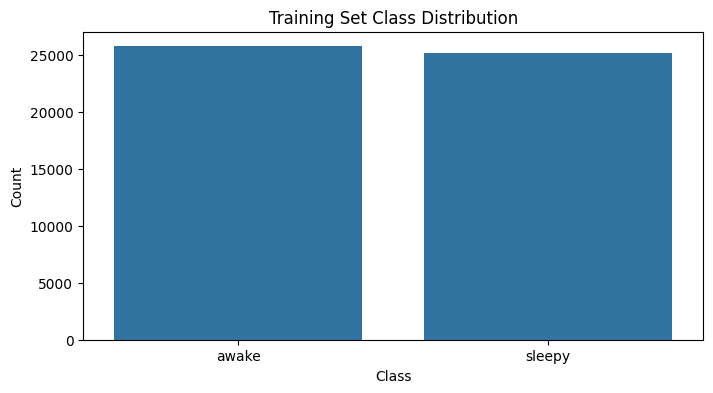

In [15]:
# Plot class distribution for train set
plot_class_distribution(train_generator, 'Training Set Class Distribution')

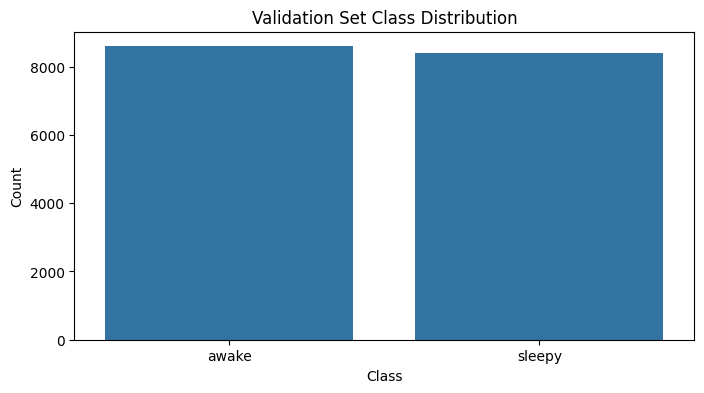

In [16]:
# Plot class distribution for val set
plot_class_distribution(val_generator, 'Validation Set Class Distribution')

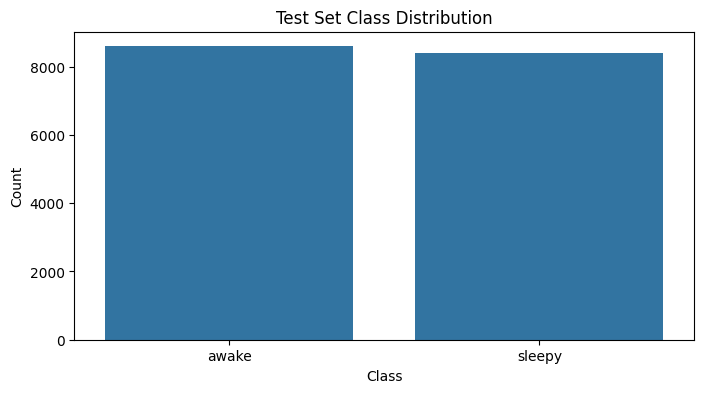

In [17]:
# Plot class distribution for test set
plot_class_distribution(test_generator, 'Test Set Class Distribution')

In [18]:
# Function to plot sample images
def plot_sample_images(generator, title): #batch of images,title for image
    images, labels = next(generator)
    class_names = list(generator.class_indices.keys())

    plt.figure(figsize=(12, 6))
    for i in range(10):
        plt.subplot(2, 5, i + 1) #images placement                     #images with class name
        plt.imshow(images[i])
        plt.title(class_names[int(labels[i])])
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

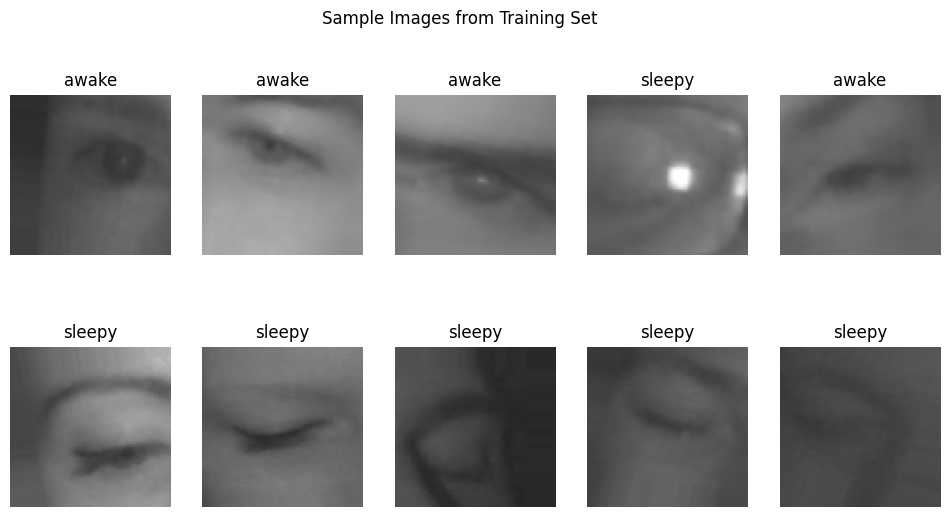

In [19]:
# Plot sample images from train set
plot_sample_images(train_generator, 'Sample Images from Training Set')

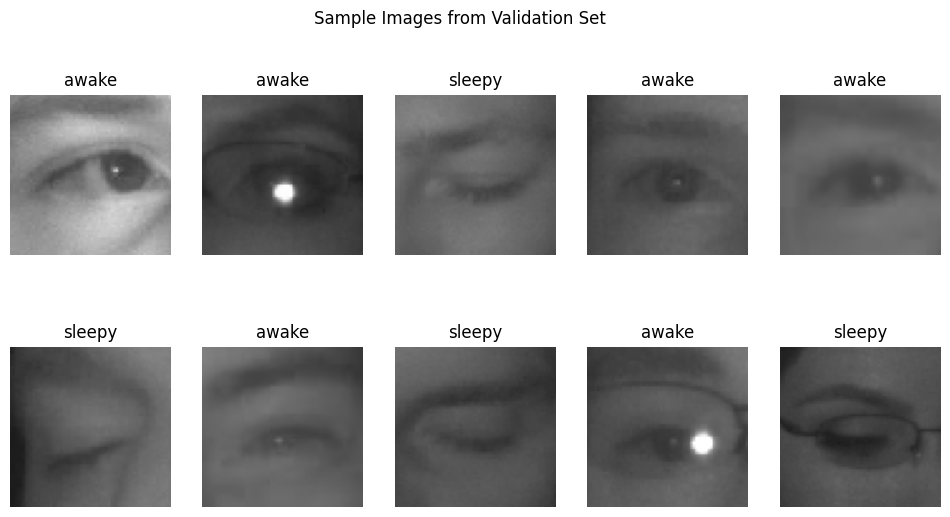

In [20]:
# Plot sample images from  val set
plot_sample_images(val_generator, 'Sample Images from Validation Set')

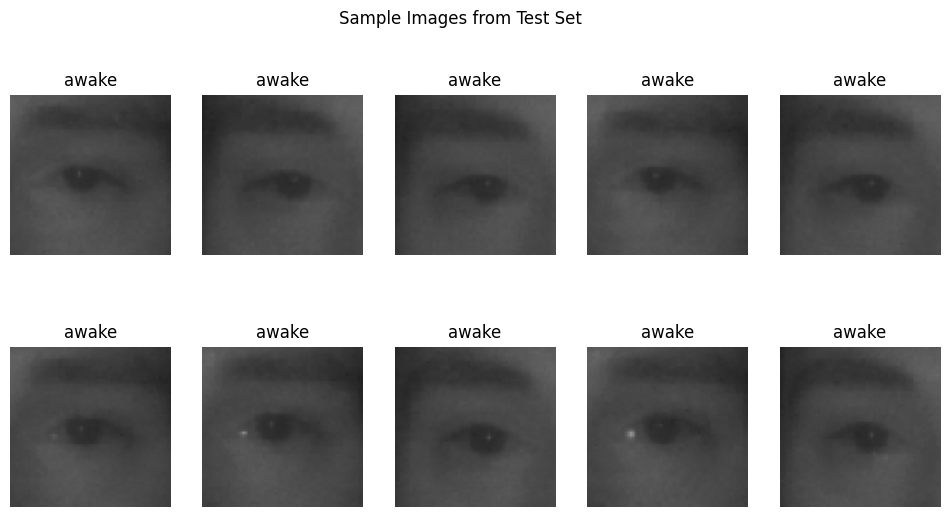

In [21]:
# Plot sample images from test set
plot_sample_images(test_generator, 'Sample Images from Test Set')

In [22]:
# Check image dimensions
print(f"Image shape: {train_generator.image_shape}")

Image shape: (64, 64, 3)


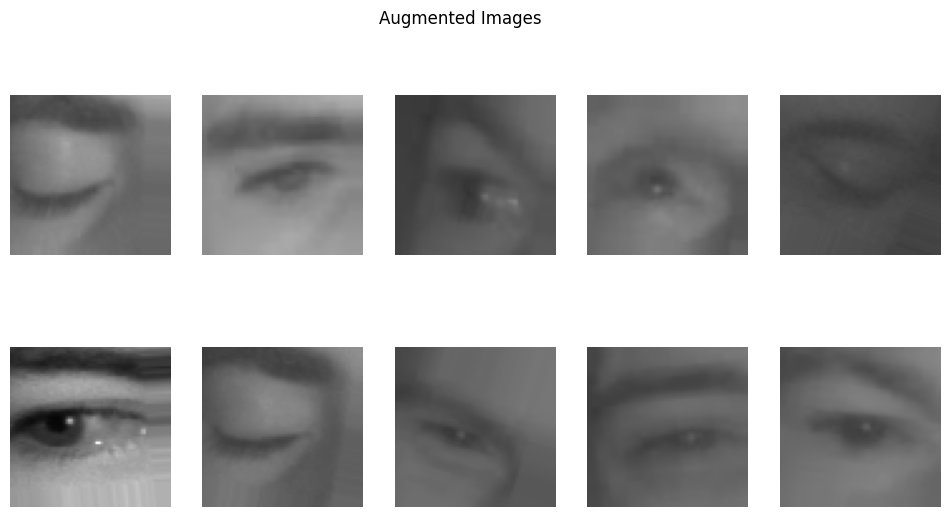

In [23]:
# Visualize data augmentation effects
augmented_images, _ = next(train_generator)
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(augmented_images[i])
    plt.axis('off')
plt.suptitle('Augmented Images')
plt.show()

# **Convolution Neural Network**

In [24]:
# Build the CNN model
model = Sequential([
    Input(shape=(64, 64, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True)


In [26]:
# Train the model
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=val_generator,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/5
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 107s 67ms/step - accuracy: 0.9800 - loss: 0.0596 - val_accuracy: 0.9855 - val_loss: 0.0389
Epoch 2/5
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 107s 67ms/step - accuracy: 0.9801 - loss: 0.0563 - val_accuracy: 0.9863 - val_loss: 0.0397
Epoch 3/5
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 105s 66ms/step - accuracy: 0.9817 - loss: 0.0532 - val_accuracy: 0.9871 - val_loss: 0.0402
Epoch 4/5
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 108s 68ms/step - accuracy: 0.9808 - loss: 0.0545 - val_accuracy: 0.9841 - val_loss: 0.0436
Epoch 5/5
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 107s 67ms/step - accuracy: 0.9822 - loss: 0.0527 - val_accuracy: 0.9872 - val_loss: 0.0388


# **Evaluation of CNN**

In [27]:
# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {accuracy * 100:.2f}%')  #fstring for readability

531/531 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.9926 - loss: 0.0216
Test Accuracy: 98.79%


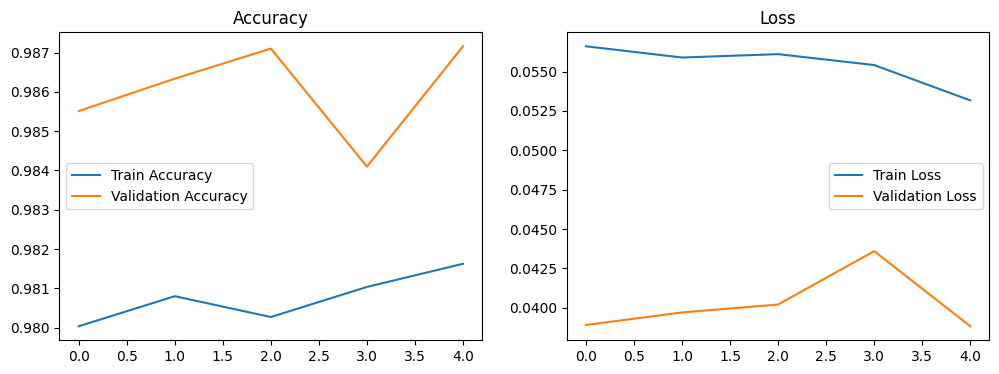

In [28]:
# Plot training and validation curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


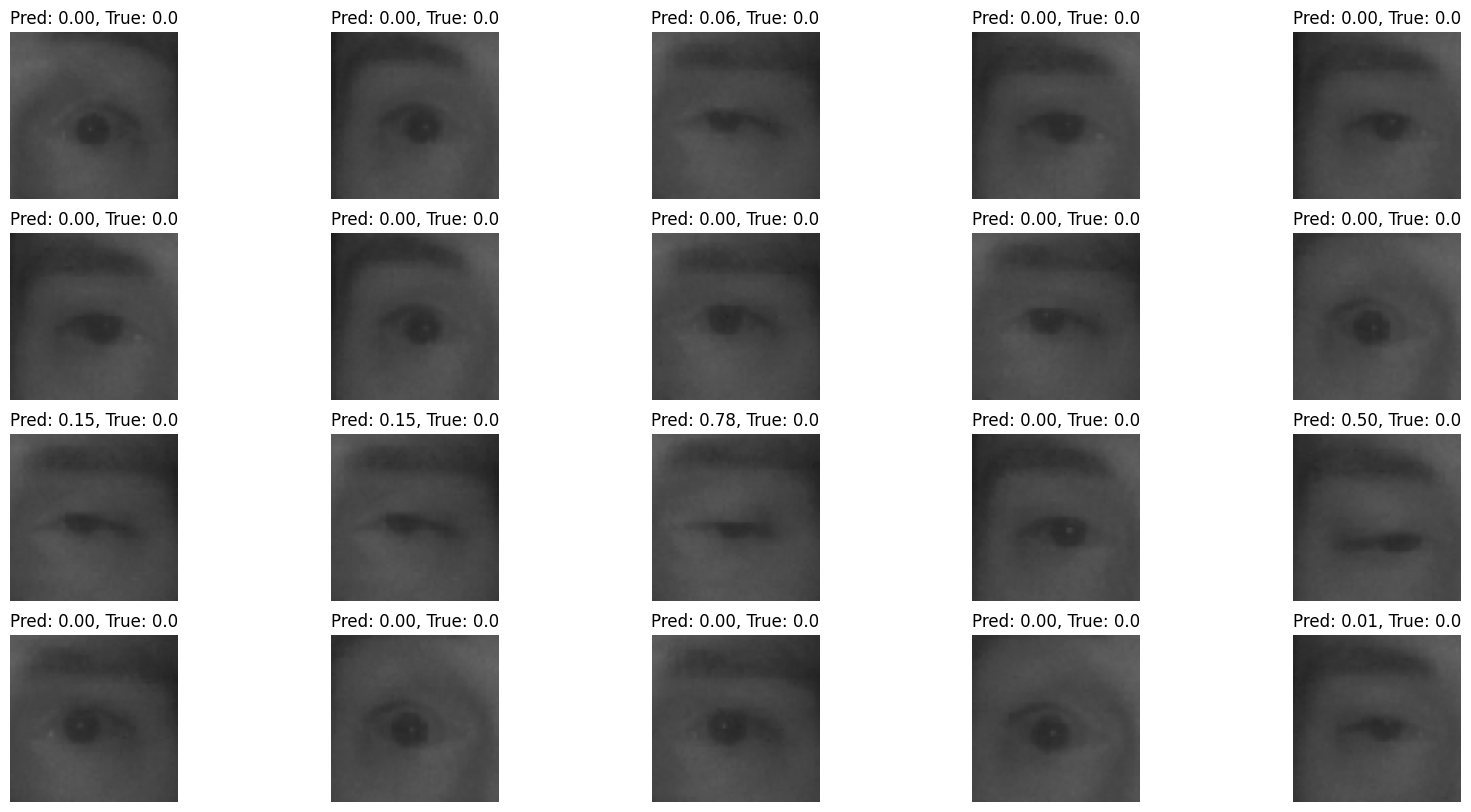

In [29]:
# Visualize predictions
import random

def visualize_predictions(model, test_generator, num_images=20):
    test_images, test_labels = next(test_generator)
    predictions = model.predict(test_images)

    plt.figure(figsize=(20, 10))
    for i in range(num_images):
        idx = random.randint(0, len(test_images) - 1)
        plt.subplot(4, 5, i + 1)
        plt.imshow(test_images[idx])
        plt.title(f'Pred: {predictions[idx][0]:.2f}, True: {test_labels[idx]}')
        plt.axis('off')
    plt.show()

visualize_predictions(model, test_generator)